In [16]:
%matplotlib inline
import random
import torch
import matplotlib.pyplot as plt

In [13]:
def synthetic_data(w,b,num):
    """生成y=Xw+b+噪声"""
    X=torch.normal(0,1,(num,len(w)))
    y=torch.matmul(X,w)+b
    y+=torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))
true_w=torch.tensor([2,-3.4])
true_b=4.2
features,labels=synthetic_data(true_w,true_b,1000)

In [14]:
features[0]

tensor([ 0.3570, -1.9815])

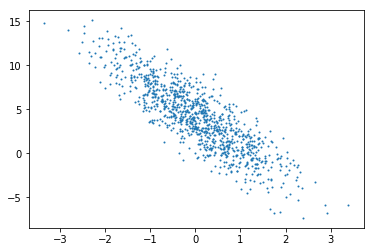

In [20]:
plt.scatter(features[:,1].numpy(),labels,1)
plt.show()

小批量数据生成

In [23]:
def data_iter(batch_size,features,labels):
    num=len(features)
    indices=list(range(num))
    random.shuffle(indices)#打乱list
    for i in range(0,num,batch_size):
        batch_indices=torch.tensor(indices[i:min(i+batch_size,num)])
        yield features[batch_indices],labels[batch_indices]
        
batch_size=10

for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

tensor([[ 1.5600,  0.6817],
        [ 2.1986, -1.6505],
        [ 2.7165,  0.1822],
        [-0.2823, -0.5159],
        [-0.6301, -2.0195],
        [-0.3913, -0.3713],
        [-0.2276,  1.0143],
        [-0.0691, -0.6273],
        [ 0.7683,  0.1073],
        [-0.5440, -0.0068]]) 
 tensor([[ 4.9868],
        [14.2062],
        [ 9.0085],
        [ 5.3952],
        [ 9.8104],
        [ 4.6767],
        [ 0.2700],
        [ 6.1959],
        [ 5.3701],
        [ 3.1310]])


# 定义初始化模型参数

In [26]:
w=torch.normal(0,0.01,size=(2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)

# 定义模型

In [27]:
def linreg(X,w,b):
    return torch.matmul(X,w)+b

# 定义损失函数

In [30]:
def squared_loss(y_hat,y):
    return (y_hat - y.reshape(y_hat.shape))**2/2

# 定义优化算法

In [29]:
def sgd(params,lr ,batch_size):
    "小批量梯度下降"
    with torch.no_grad():#不用跟踪反向梯度计算
        for param in params:
            param-=lr*param.grad/batch_size
            param.grad.zero_()

## 训练过程

In [31]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.045094
epoch 2, loss 0.000185
epoch 3, loss 0.000053


In [32]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.0011, -0.0009], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0017], grad_fn=<RsubBackward1>)
